# Decision Tree

# Step1: Import necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnigns for clean output
import warnings
warnings.filterwarnings('ignore')


# Step 2:  Load and Explore Data

In [4]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head() # here I am displaying  first five rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info() # checking data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe() # checkign summary statistics

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# step3: Explortory Data Analysis (EDA)

In [7]:
df.isnull().sum() # here I am checking for the missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
# Dataset has no missing value . Its great

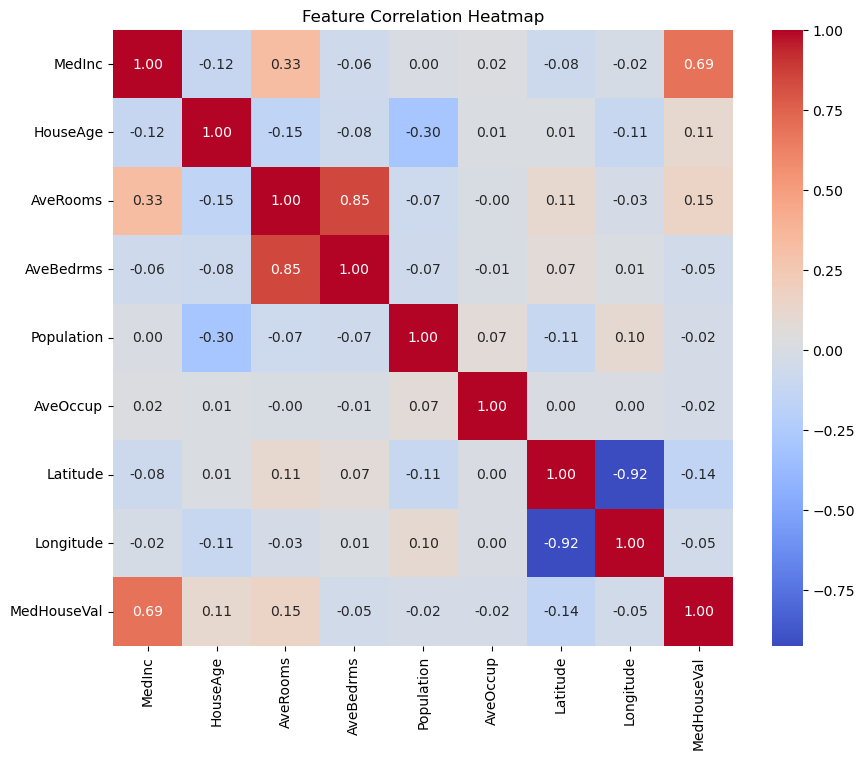

In [9]:
# now checking for the correalting . vizauzling using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


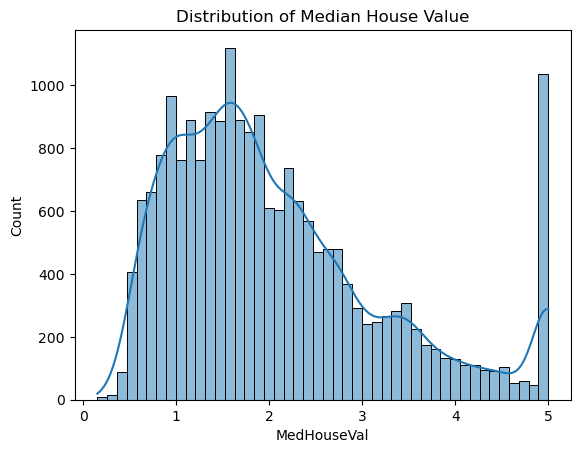

In [10]:
sns.histplot(df["MedHouseVal"], kde=True)
plt.title("Distribution of Median House Value")
plt.show()
# to check the distribution of Target(MedHouseVal)

# Step 4:  Feature Selection & Train_Test Split

In [11]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Train a Baseline Decision Tree Model

In [12]:
# Here first I Initialize model
tree_reg = DecisionTreeRegressor(random_state=42)

# Train model
tree_reg.fit(X_train, y_train)

# Predictions
y_pred = tree_reg.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("MSE:", mse)


R² Score: 0.622075845135081
MSE: 0.495235205629094


# Step 6: Model  Performance Visualization

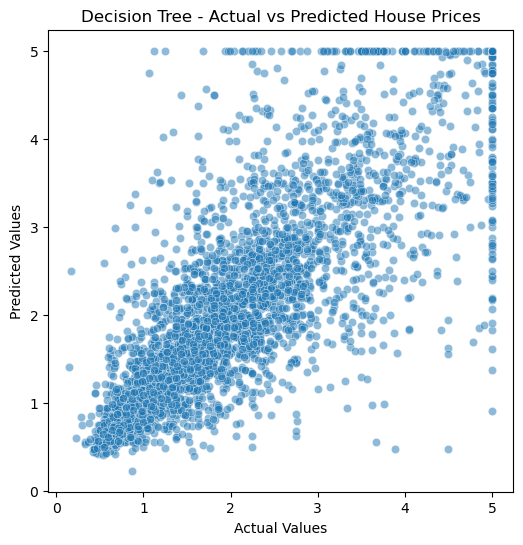

In [13]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree - Actual vs Predicted House Prices")
plt.show()


# Step 7: Feature Importance

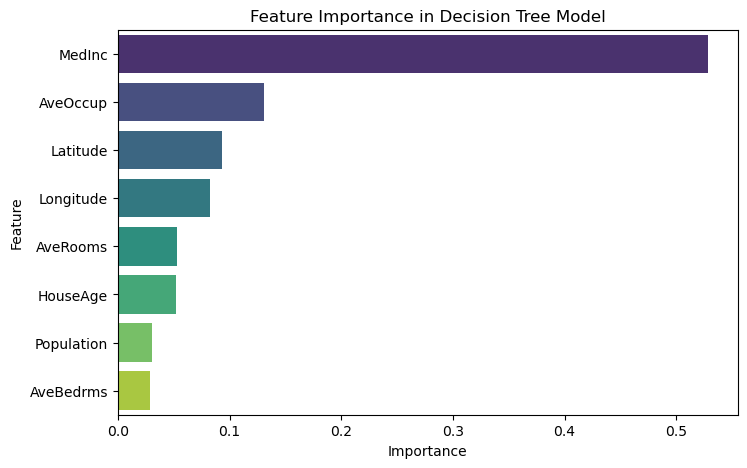

In [14]:
# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Decision Tree Model")
plt.show()


In [15]:
# Explanation: Features with higher importance contribute more to decision-making.
#For example in above plot, “MedInc” (median income) is  the strongest predictor of house price.

# Step 8: Avoiding Overfitting: Hyperparamter Tuning

In [16]:
# Define parameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV to find best parameters
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Step 9: Train Final Model with Best Parameter

In [17]:
best_tree = grid_search.best_estimator_

# Evaluate again
y_pred_best = best_tree.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print("Optimized R² Score:", r2_best)
print("Optimized MSE:", mse_best)


Optimized R² Score: 0.6899262410913389
Optimized MSE: 0.4063234375908137


# Step 10: Cross Validation for Generalization

In [18]:
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


Cross-validation R² scores: [0.37262475 0.58611364 0.61285512 0.49859841 0.59008484]
Mean CV R²: 0.5320553514218289


In [19]:
# Explantion on step 10: Cross-validation checks how well the model generalizes to unseen data.
# It prevents overfitting by testing the model on multiple folds of the dataset.

# Step 11: Visualize the Tree

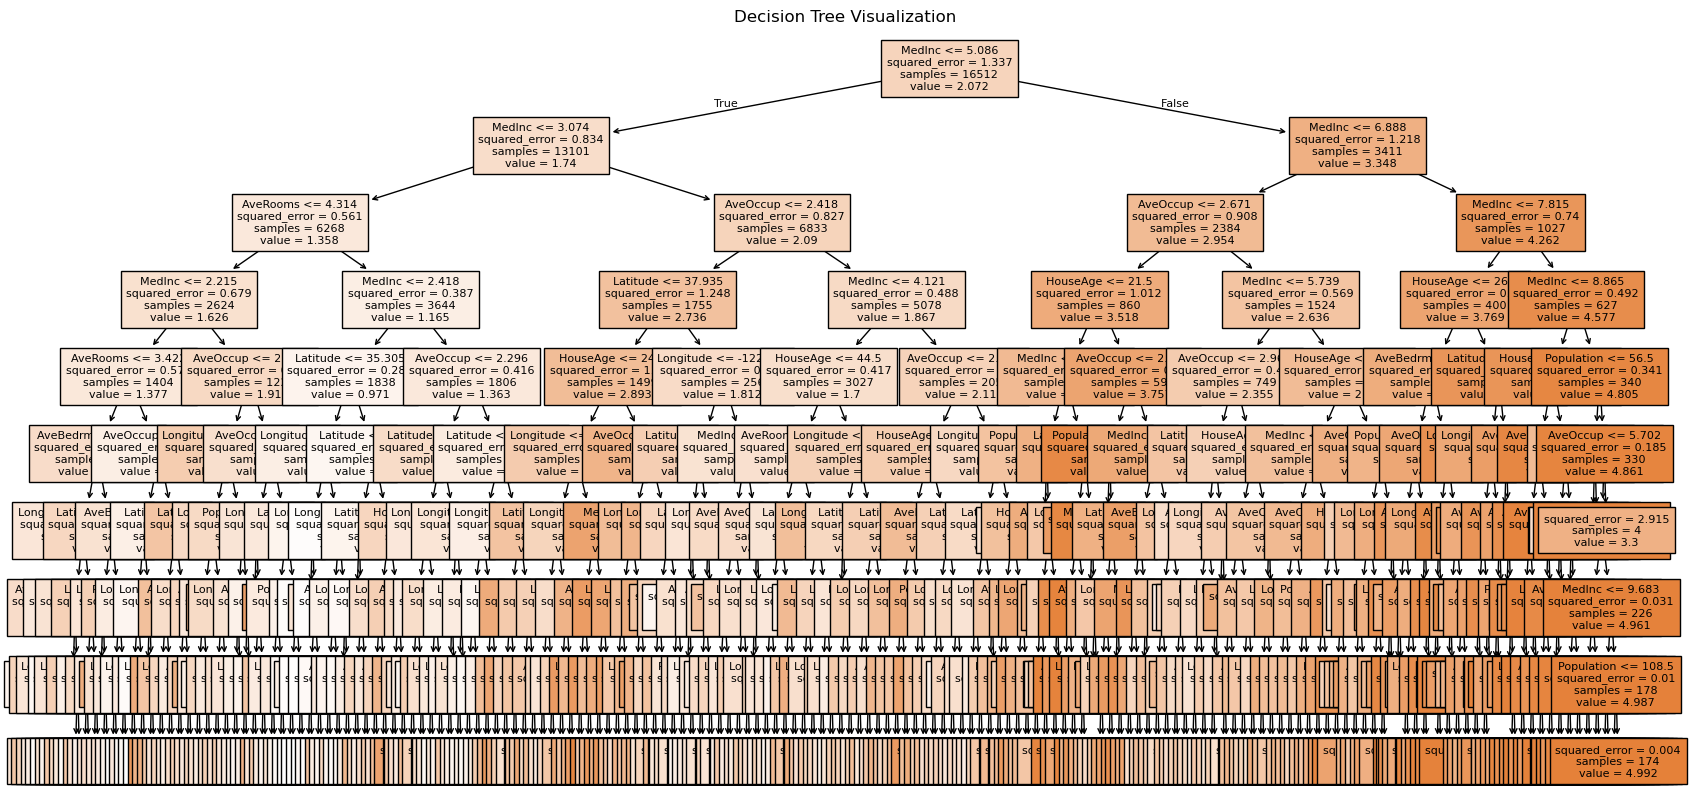

In [26]:
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X.columns, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

#I recommend to use this code only when the dataset is small. 


# As my dataset is large it not showing clearly so I will just  use the first 3 level for now.

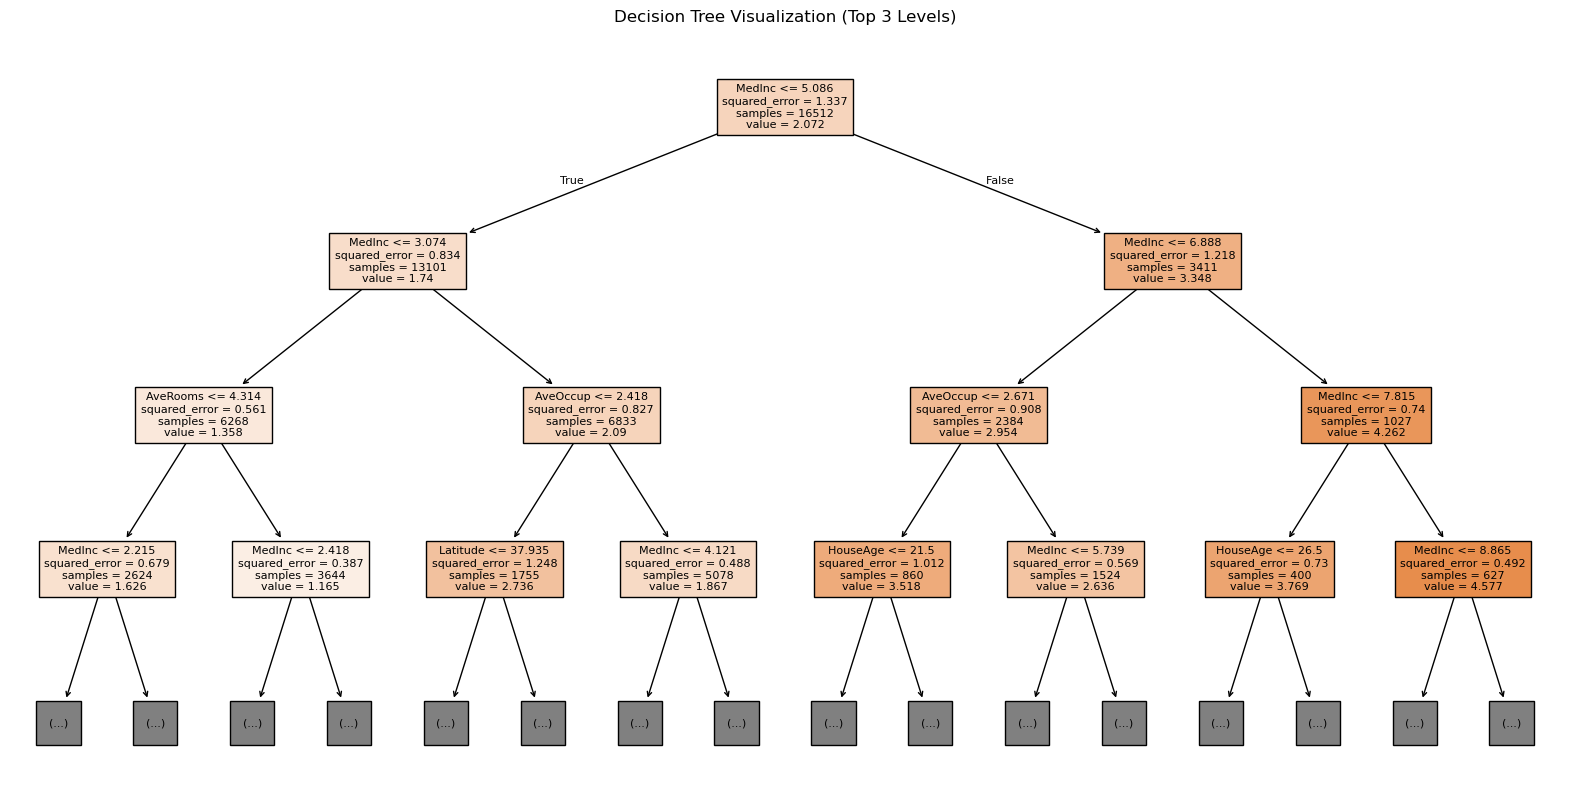

In [27]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree, 
          filled=True, 
          feature_names=X.columns, 
          fontsize=8, 
          max_depth=3)   # only plot first 3 levels
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()
